In [9]:
import pandas as pd

# Carregar o DataFrame (o código de carregamento precisa ser executado previamente)
caminho_para_o_arquivo = 'enso.csv'
dados = pd.read_csv(
    caminho_para_o_arquivo,
    sep='|',
    skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78]
)
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados.drop(columns=['Extra'], inplace=True)

# Filtrar os dados para anos até 2024
dados_filtrados = dados[dados['Year'] <= 2024]

# Garantir que os dados estão ordenados por ano
dados_filtrados = dados_filtrados.sort_values(by='Year')

# Exibir os dados
print(dados_filtrados)


    Year  DJF  JFM  FMA     MAM     AMJ     MJJ     JJA     JAS     ASO  \
0   1950 -1.5 -1.3 -1.2   -1.2    -1.1    -0.9    -0.5    -0.4    -0.4    
1   1951 -0.8 -0.5 -0.2    0.2     0.4     0.6     0.7     0.9     1.0    
2   1952  0.5  0.4  0.3    0.3     0.2     0.0    -0.1     0.0     0.2    
3   1953  0.4  0.6  0.6    0.7     0.8     0.8     0.7     0.7     0.8    
4   1954  0.8  0.5  0.0   -0.4    -0.5    -0.5    -0.6    -0.8    -0.9    
..   ...  ...  ...  ...     ...     ...     ...     ...     ...     ...   
70  2020  0.5  0.5  0.4    0.2    -0.1    -0.3    -0.4    -0.6    -0.9    
71  2021 -1.0 -0.9 -0.8   -0.7    -0.5    -0.4    -0.4    -0.5    -0.7    
72  2022 -1.0 -0.9 -1.0   -1.1    -1.0    -0.9    -0.8    -0.9    -1.0    
73  2023 -0.7 -0.4 -0.1    0.2     0.5     0.8     1.1     1.3     1.6    
74  2024  1.8  1.5  1.1                                                   

       SON     OND     NDJ  
0    -0.4    -0.6    -0.8   
1     1.2     1.0     0.8   
2     0.1   

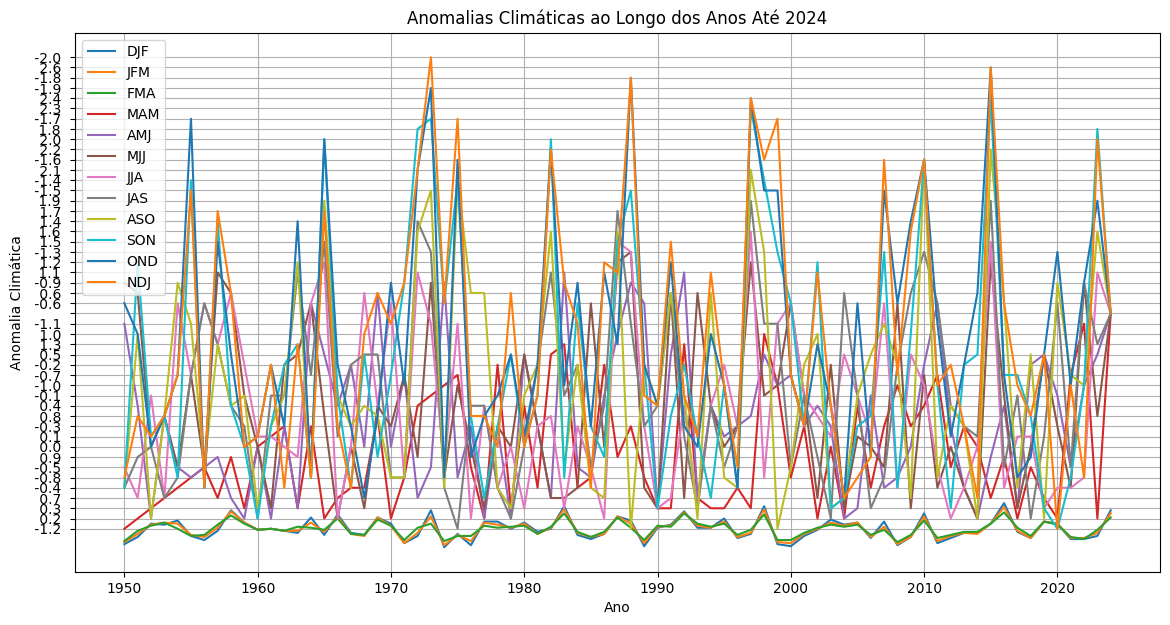

In [10]:
import matplotlib.pyplot as plt

# Plotar gráficos para visualizar as anomalias climáticas ao longo dos anos
plt.figure(figsize=(14, 7))
for col in dados_filtrados.columns[1:]:  # Exclui a coluna 'Year'
    plt.plot(dados_filtrados['Year'], dados_filtrados[col], label=col)
plt.title('Anomalias Climáticas ao Longo dos Anos Até 2024')
plt.xlabel('Ano')
plt.ylabel('Anomalia Climática')
plt.legend()
plt.grid(True)
plt.show()


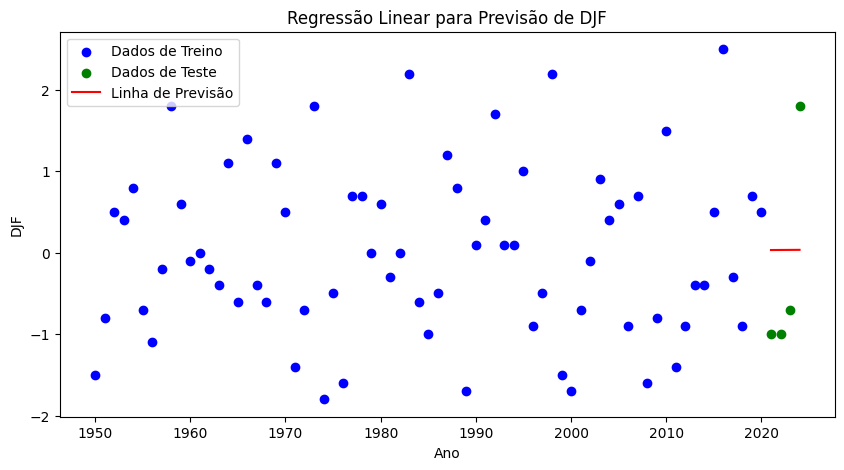

                            OLS Regression Results                            
Dep. Variable:                    DJF   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.01600
Date:                Sat, 04 May 2024   Prob (F-statistic):              0.900
Time:                        14:16:20   Log-Likelihood:                -102.45
No. Observations:                  71   AIC:                             208.9
Df Residuals:                      69   BIC:                             213.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5054     11.945     -0.126      0.9

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar os dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['Year', 'DJF']]  # Focar apenas na coluna 'DJF'
dados.dropna(inplace=True)  # Certificar-se de que não há valores NaN

# Converter Year para datetime e extrair o ano
dados['Year'] = pd.to_datetime(dados['Year'], format='%Y')
dados['Year'] = dados['Year'].dt.year

# Dividir os dados em treino e teste
dados_treino = dados[dados['Year'] <= 2020]
dados_teste = dados[dados['Year'] > 2020]

# Modelo de regressão linear
X_treino = sm.add_constant(dados_treino['Year'])  # adicionar uma constante (intercepto)
y_treino = dados_treino['DJF']
modelo = sm.OLS(y_treino, X_treino).fit()

# Previsões
X_teste = sm.add_constant(dados_teste['Year'])
predicoes = modelo.predict(X_teste)

# Avaliar o modelo
plt.figure(figsize=(10, 5))
plt.scatter(dados_treino['Year'], y_treino, color='blue', label='Dados de Treino')
plt.scatter(dados_teste['Year'], dados_teste['DJF'], color='green', label='Dados de Teste')
plt.plot(dados_teste['Year'], predicoes, color='red', label='Linha de Previsão')
plt.xlabel('Ano')
plt.ylabel('DJF')
plt.title('Regressão Linear para Previsão de DJF')
plt.legend()
plt.show()

# Exibir resumo do modelo
print(modelo.summary())


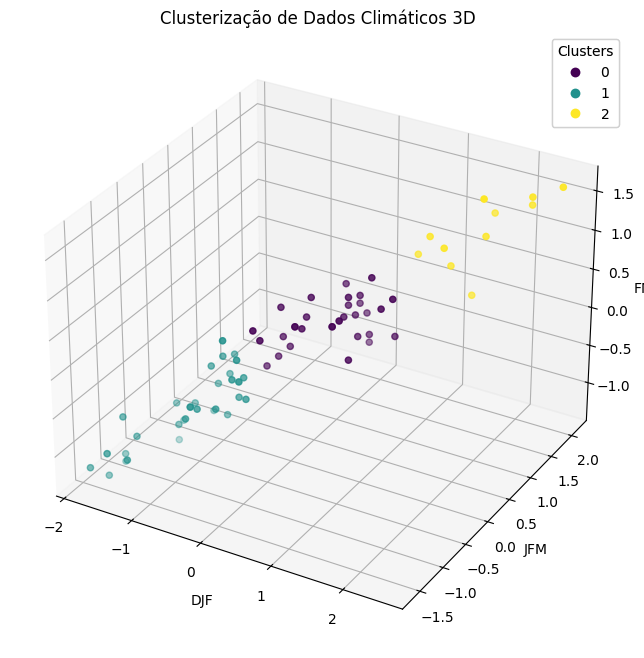

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carregar dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['DJF', 'JFM', 'FMA']]  # Selecionando apenas três colunas para a visualização 3D
dados.dropna(inplace=True)  # Removendo dados faltantes

# Clustering
kmeans = KMeans(n_clusters=3)
dados['Cluster'] = kmeans.fit_predict(dados[['DJF', 'JFM', 'FMA']])

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(dados['DJF'], dados['JFM'], dados['FMA'], c=dados['Cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('DJF')
ax.set_ylabel('JFM')
ax.set_zlabel('FMA')
plt.title('Clusterização de Dados Climáticos 3D')
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carregar dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['DJF', 'JFM', 'FMA']]  # Selecionando apenas três colunas para a visualização 3D
dados.dropna(inplace=True)  # Removendo dados faltantes


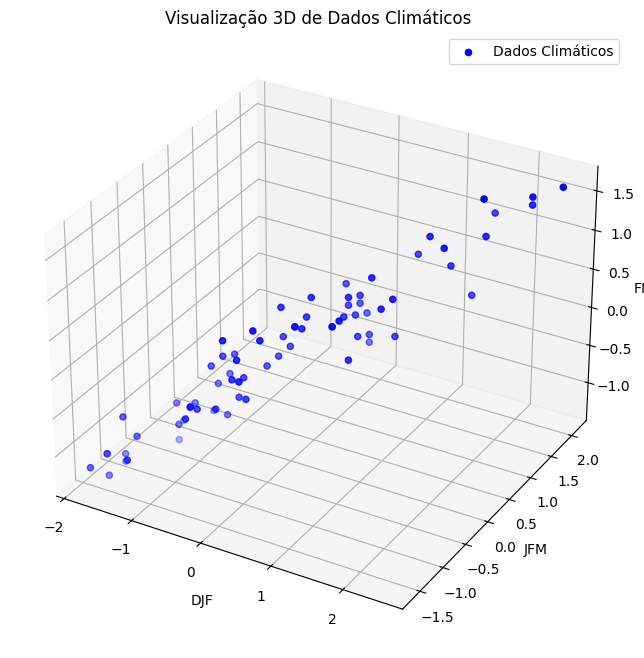

In [14]:
# Configuração do gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os dados
ax.scatter(dados['DJF'], dados['JFM'], dados['FMA'], c='blue', marker='o', label='Dados Climáticos')

# Adicionando rótulos e título
ax.set_xlabel('DJF')
ax.set_ylabel('JFM')
ax.set_zlabel('FMA')
plt.title('Visualização 3D de Dados Climáticos')

# Adicionando legenda
ax.legend()

# Mostrar gráfico
plt.show()


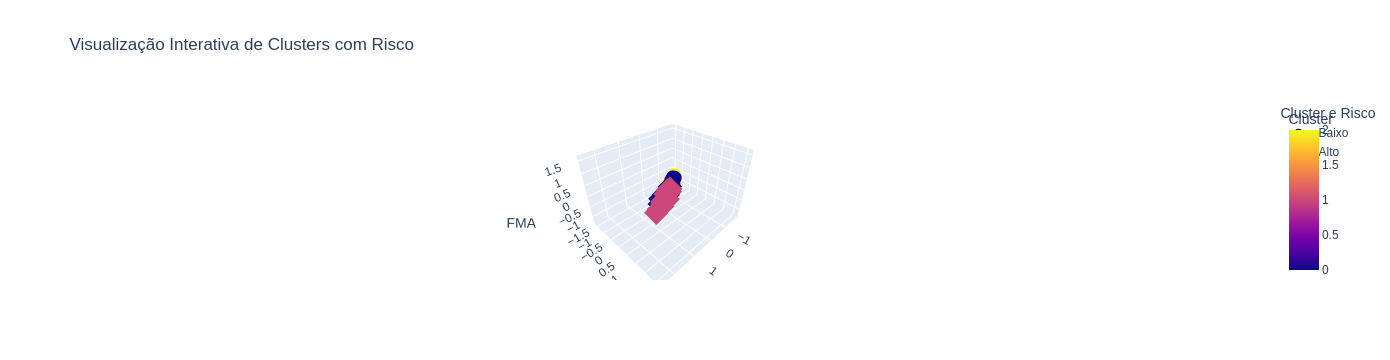

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Carregar dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['DJF', 'JFM', 'FMA']]  # Focando nas primeiras três colunas para a visualização 3D
dados.dropna(inplace=True)  # Limpar dados faltantes

# Clustering com KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(dados)

# Adicionar clusters ao DataFrame
dados['Cluster'] = clusters

# Definir risco com base no limite de DJF maior que 0.5 por exemplo
dados['Risco'] = dados['DJF'].apply(lambda x: 'Alto' if x > 0.5 else 'Baixo')

# Visualização interativa com Plotly
fig = px.scatter_3d(dados, x='DJF', y='JFM', z='FMA', color='Cluster', symbol='Risco',
                    labels={'DJF': 'DJF', 'JFM': 'JFM', 'FMA': 'FMA'},
                    title='Visualização Interativa de Clusters com Risco')
fig.update_layout(legend_title_text='Cluster e Risco')
fig.show()


In [2]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Supondo que estes dados já estão carregados e preparados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['Year', 'DJF', 'JFM', 'FMA']]
dados.dropna(inplace=True)

# Definindo riscos com base em um limiar para DJF
threshold = 0.5
dados['Risco'] = dados['DJF'].apply(lambda x: 'Alto' if x > threshold else 'Baixo')

# Clustering (opcional, se quiser mostrar clusters também)
kmeans = KMeans(n_clusters=3)
dados['Cluster'] = kmeans.fit_predict(dados[['DJF', 'JFM', 'FMA']])

# Criando o gráfico 3D interativo
fig = px.scatter_3d(dados, x='DJF', y='JFM', z='FMA',
                    color='Cluster', symbol='Risco',
                    hover_data=['Year'],  # Permite visualizar o ano ao passar o mouse
                    title='Visualização 3D de Dados Climáticos com Risco',
                    labels={'DJF': 'DJF', 'JFM': 'JFM', 'FMA': 'FMA'})

# Destacar um ano específico, por exemplo, 2020
ano_especifico = 2020
dados_ano = dados[dados['Year'] == ano_especifico]

for _, row in dados_ano.iterrows():
    fig.add_trace(px.scatter_3d(x=[row['DJF']], y=[row['JFM']], z=[row['FMA']],
                                marker=dict(size=10, color='red')).data[0])

# Adicionar anotação para o ano específico
fig.add_annotation(x=dados_ano['DJF'].values[0], y=dados_ano['JFM'].values[0], z=dados_ano['FMA'].values[0],
                   text=f"Ano Destaque: {ano_especifico}",
                   showarrow=True,
                   arrowhead=1,
                   font=dict(family="Courier New, monospace", size=16, color="#ffffff"),
                   align="center",
                   arrowcolor="#636363",
                   arrowsize=3,
                   arrowwidth=2,
                   arrowhead=2,
                   ax=20,
                   ay=-30)

fig.show()


TypeError: scatter_3d() got an unexpected keyword argument 'marker'

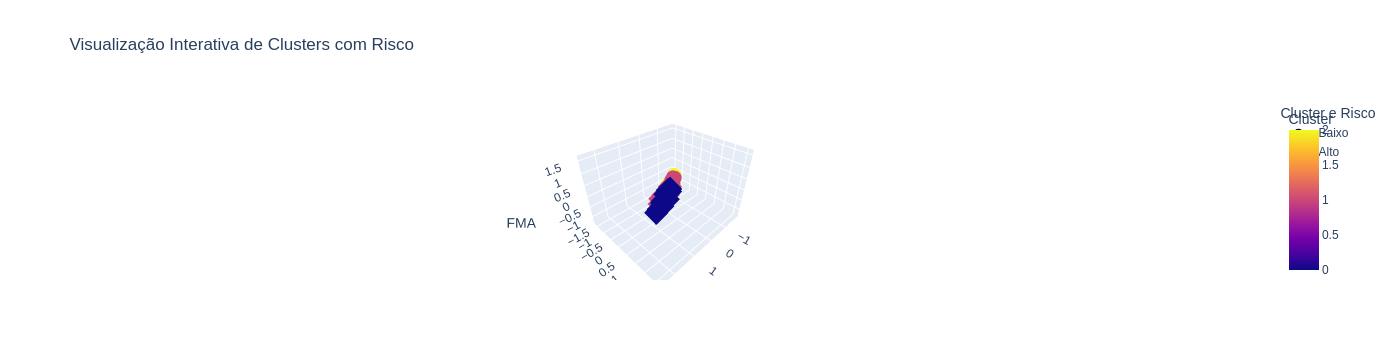

In [3]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['DJF', 'JFM', 'FMA']]  # Focando nas primeiras três colunas para a visualização 3D
dados.dropna(inplace=True)  # Limpar dados faltantes

# Normalização dos dados
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)

# Clustering com KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(dados_scaled)

# Adicionar clusters ao DataFrame
dados['Cluster'] = clusters

# Definir risco com base no limite de DJF maior que 0.5 por exemplo
dados['Risco'] = dados['DJF'].apply(lambda x: 'Alto' if x > 0.5 else 'Baixo')

# Visualização interativa com Plotly
fig = px.scatter_3d(dados, x='DJF', y='JFM', z='FMA', color='Cluster', symbol='Risco',
                    labels={'DJF': 'DJF', 'JFM': 'JFM', 'FMA': 'FMA'},
                    title='Visualização Interativa de Clusters com Risco',
                    hover_data=['DJF', 'JFM', 'FMA'])  # Adicionando dados ao hover para mais informações
fig.update_layout(legend_title_text='Cluster e Risco')
fig.show()


/tmp/ipykernel_24032/64138110.py:25: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Grupo 1997' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



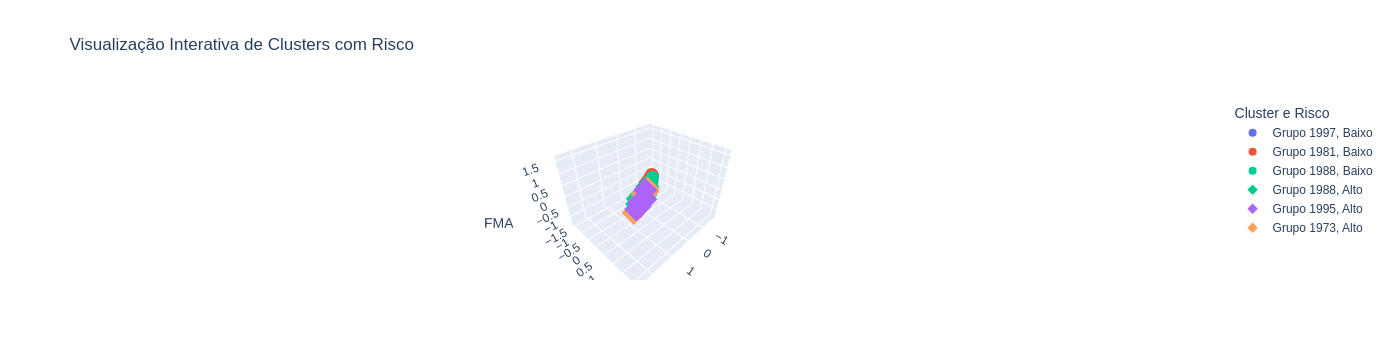

In [4]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['Year', 'DJF', 'JFM', 'FMA']]  # Incluir Year para identificação
dados.dropna(inplace=True)  # Limpar dados faltantes

# Normalização dos dados
scaler = StandardScaler()
features = dados[['DJF', 'JFM', 'FMA']]
features_scaled = scaler.fit_transform(features)

# Clustering com KMeans
kmeans = KMeans(n_clusters=5)  # Aumentando o número de clusters
clusters = kmeans.fit_predict(features_scaled)
dados['Cluster'] = clusters

# Nomear clusters baseado na mediana dos anos
for i in range(kmeans.n_clusters):
    median_year = dados[dados['Cluster'] == i]['Year'].median()
    dados.loc[dados['Cluster'] == i, 'Cluster'] = f"Grupo {int(median_year)}"

# Definir risco com base no limite de DJF maior que 0.5 por exemplo
dados['Risco'] = dados['DJF'].apply(lambda x: 'Alto' if x > 0.5 else 'Baixo')

# Visualização interativa com Plotly
fig = px.scatter_3d(dados, x='DJF', y='JFM', z='FMA', color='Cluster', symbol='Risco',
                    labels={'DJF': 'DJF', 'JFM': 'JFM', 'FMA': 'FMA'},
                    title='Visualização Interativa de Clusters com Risco',
                    hover_data=['Year'])
fig.update_layout(legend_title_text='Cluster e Risco')
fig.show()


/tmp/ipykernel_24032/248674535.py:25: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Grupo 1994' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



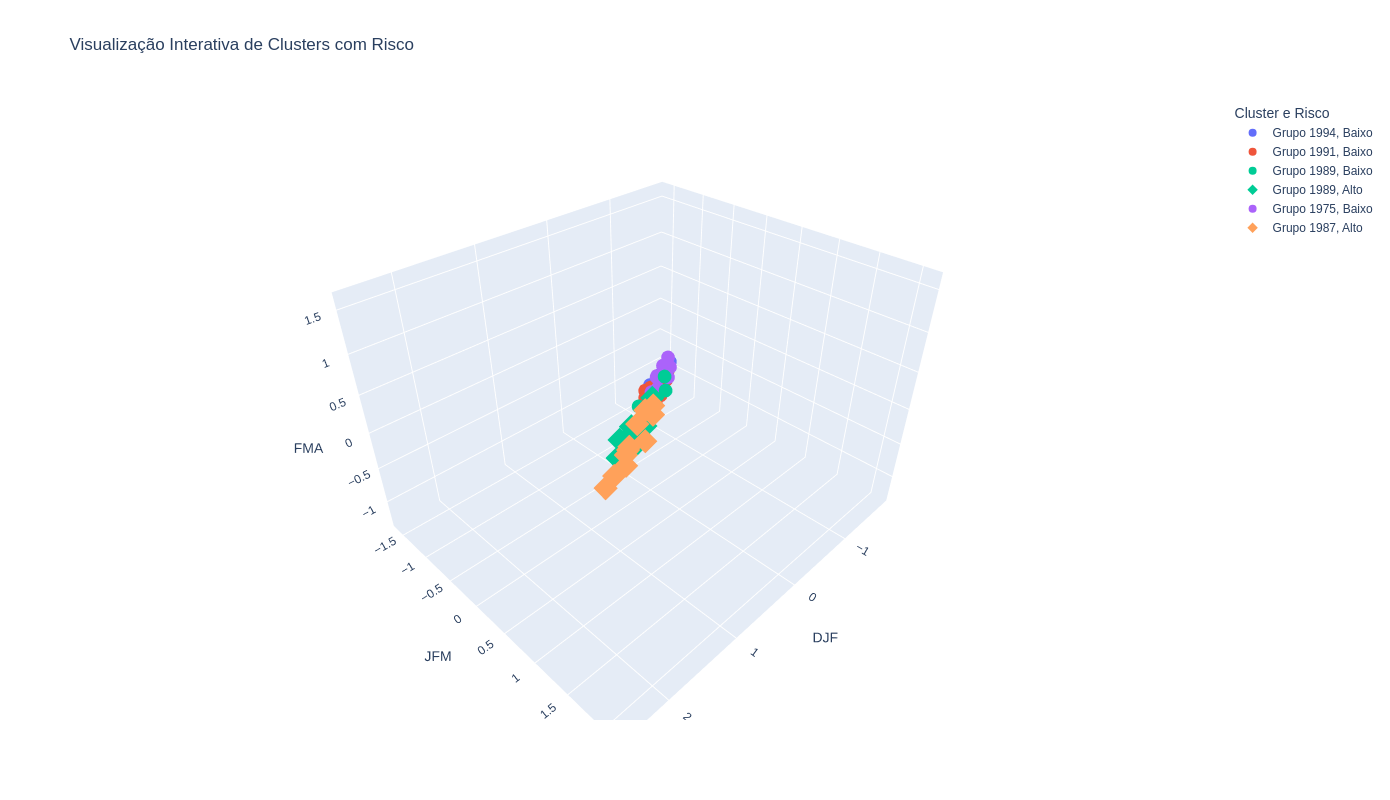

In [5]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['Year', 'DJF', 'JFM', 'FMA']]  # Incluir Year para identificação
dados.dropna(inplace=True)  # Limpar dados faltantes

# Normalização dos dados
scaler = StandardScaler()
features = dados[['DJF', 'JFM', 'FMA']]
features_scaled = scaler.fit_transform(features)

# Clustering com KMeans
kmeans = KMeans(n_clusters=5)  # Aumentando o número de clusters
clusters = kmeans.fit_predict(features_scaled)
dados['Cluster'] = clusters

# Nomear clusters baseado na mediana dos anos
for i in range(kmeans.n_clusters):
    median_year = dados[dados['Cluster'] == i]['Year'].median()
    dados.loc[dados['Cluster'] == i, 'Cluster'] = f"Grupo {int(median_year)}"

# Definir risco com base no limite de DJF maior que 0.5 por exemplo
dados['Risco'] = dados['DJF'].apply(lambda x: 'Alto' if x > 0.5 else 'Baixo')

# Visualização interativa com Plotly
fig = px.scatter_3d(dados, x='DJF', y='JFM', z='FMA', color='Cluster', symbol='Risco',
                    labels={'DJF': 'DJF', 'JFM': 'JFM', 'FMA': 'FMA'},
                    title='Visualização Interativa de Clusters com Risco',
                    hover_data=['Year'])

# Ajustando o tamanho do gráfico
fig.update_layout(width=1000, height=800, legend_title_text='Cluster e Risco')

fig.show()


In [11]:
import pandas as pd

# Carregar dados
dados = pd.read_csv('enso.csv', sep='|', skiprows=lambda x: x in [0, 12, 23, 34, 45, 56, 67, 78])
dados.columns = ['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'Extra']
dados = dados[['Year', 'FMA']]  # Selecionando apenas o ano e a coluna DJF

# Definir risco
limite_alto_risco = 1
dados['Risco'] = dados['FMA'].apply(lambda x: 'Alto' if x > limite_alto_risco else 'Baixo')

# Filtrar os dados para apenas anos de alto risco
anos_alto_risco = dados[dados['Risco'] == 'Alto']

# Mostrar os anos de alto risco em uma tabela
print("Anos de Alto Risco:")
print(anos_alto_risco[['Year', 'FMA']])


Anos de Alto Risco:
    Year  FMA
8   1958  1.3
33  1983  1.5
37  1987  1.1
42  1992  1.5
48  1998  1.4
66  2016  1.6
74  2024  1.1


In [17]:
import pandas as pd

# Carregar o arquivo Excel
file_path = 'emdat-country-profiles_2024_04_29.xlsx' 
dados = pd.read_excel(file_path)

print("Número de colunas:", len(dados.columns))
print("Nomes das colunas:", dados.columns.tolist())

# Renomear colunas conforme a imagem para garantir consistência
dados.columns = [
    'Year', 'Country', 'ISO', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
    'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, original)', 'Total Damage (USD, adjusted)', 'CPI'
]

# Exibir informações básicas para verificação
print(dados.head())

# Suponha que você queira filtrar os dados para um ano específico, por exemplo, 1983
dados_1983 = dados[dados['Year'] == 1983]

# Mostrar os dados filtrados
print(dados_1983)

Número de colunas: 13
Nomes das colunas: ['Year', 'Country', 'ISO', 'Disaster Group', 'Disaster Subroup', 'Disaster Type', 'Disaster Subtype', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, original)', 'Total Damage (USD, adjusted)', 'CPI']
   Year      Country  ISO Disaster Group Disaster Subgroup Disaster Type  \
0  2000  Afghanistan  AFG        Natural    Climatological       Drought   
1  2000      Algeria  DZA        Natural      Hydrological         Flood   
2  2000      Algeria  DZA        Natural      Hydrological         Flood   
3  2000      Algeria  DZA        Natural    Meteorological         Storm   
4  2000       Angola  AGO        Natural      Hydrological         Flood   

  Disaster Subtype  Total Events  Total Affected  Total Deaths  \
0          Drought             1       2580000.0          37.0   
1      Flash flood             2           105.0          37.0   
2  Flood (General)             2           100.0           7.0   
3  Storm (Gener

In [3]:
import qgrid

# Configurar opções para qgrid
qgrid.set_grid_options(show_toolbar=True)

# Criar uma visualização interativa do DataFrame filtrado
grid = qgrid.show_grid(dados_filtrados[['Year', 'Country', 'Disaster Type', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, original)', 'Total Damage (USD, adjusted)']], show_toolbar=True)
grid
# Define uma função para colorir valores negativos em vermelho e positivos em preto
def color_negative_red(value):
    color = 'red' if type(value) == int or type(value) == float and value < 0 else 'black'
    return 'color: %s' % color

# Estilizando o DataFrame
styled_df = dados_filtrados[['Year', 'Country', 'Disaster Type', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, original)', 'Total Damage (USD, adjusted)']].style.applymap(color_negative_red).set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
styled_df


TypeError: register() missing 1 required positional argument: 'widget'

In [16]:
import pandas as pd

# Suponha que 'dados' seja o seu DataFrame já carregado
# Listando os anos de interesse
# anos_alvo = [1958, 1983, 1987, 1992, 1998, 2016, 2024]

# Filtrando o DataFrame para apenas os anos alvo
dados_filtrados = dados[dados['Year']]

# Exibindo os dados relevantes
print(dados_filtrados[['Year', 'Country', 'Disaster Type', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, original)', 'Total Damage (USD, adjusted)']])


KeyError: "None of [Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,\n       ...\n       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],\n      dtype='int64', length=5990)] are in the [columns]"

In [13]:
print(dados)

      Year                                               Country  ISO  \
0     2000                                           Afghanistan  AFG   
1     2000                                               Algeria  DZA   
2     2000                                               Algeria  DZA   
3     2000                                               Algeria  DZA   
4     2000                                                Angola  AGO   
5     2000                                                Angola  AGO   
6     2000                                                Angola  AGO   
7     2000                                             Argentina  ARG   
8     2000                                             Argentina  ARG   
9     2000                                             Argentina  ARG   
10    2000                                             Argentina  ARG   
11    2000                                             Argentina  ARG   
12    2000                                         

In [5]:
import ipywidgets as widgets
import pandas as pd

# Suponha que 'dados_filtrados' seja seu DataFrame
df_widget = widgets.Output()

with df_widget:
    display(dados_filtrados[['Year', 'Country', 'Disaster Type', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, original)', 'Total Damage (USD, adjusted)']])

display(df_widget)


Output()

In [6]:
import ipywidgets as widgets
import pandas as pd

# Suponha que 'dados_filtrados' seja seu DataFrame
# Preparando o widget de saída para exibir o DataFrame
output_widget = widgets.Output()

# Função para atualizar o conteúdo no widget de saída
def display_dataframe():
    with output_widget:
        # Limpar a saída anterior
        output_widget.clear_output()
        # Exibir o DataFrame
        display(dados_filtrados)

# Botão para recarregar os dados no DataFrame
refresh_button = widgets.Button(description="Atualizar Tabela")

# Definindo a ação do botão para atualizar a visualização do DataFrame
def on_button_clicked(b):
    display_dataframe()

refresh_button.on_click(on_button_clicked)

# Mostrar o botão e o widget de saída
display(refresh_button, output_widget)

# Inicialmente mostrar os dados
display_dataframe()


Button(description='Atualizar Tabela', style=ButtonStyle())

Output()

In [7]:
import ipywidgets as widgets
import pandas as pd

# Suponha que 'dados_filtrados' seja seu DataFrame completo

# Criar widgets para os filtros
ano_dropdown = widgets.Dropdown(
    options=sorted(dados_filtrados['Year'].unique()),
    value=sorted(dados_filtrados['Year'].unique())[0],
    description='Ano:',
    disabled=False,
)

pais_dropdown = widgets.Dropdown(
    options=['Todos'] + sorted(dados_filtrados['Country'].unique().tolist()),
    value='Todos',
    description='País:',
    disabled=False,
)

# Widget de saída para exibir o DataFrame filtrado
output = widgets.Output()

def filtrar_dados(change):
    with output:
        output.clear_output()
        if pais_dropdown.value == 'Todos':
            filtered_data = dados_filtrados[dados_filtrados['Year'] == ano_dropdown.value]
        else:
            filtered_data = dados_filtrados[(dados_filtrados['Year'] == ano_dropdown.value) & (dados_filtrados['Country'] == pais_dropdown.value)]
        display(filtered_data)

# Adicionar observadores aos widgets de dropdown para atualizar os dados ao mudar os valores
ano_dropdown.observe(filtrar_dados, names='value')
pais_dropdown.observe(filtrar_dados, names='value')

# Exibir os widgets
display(ano_dropdown, pais_dropdown, output)

# Chamar a função inicialmente para mostrar os dados
filtrar_dados(None)


Dropdown(description='Ano:', options=(2016, 2024), value=2016)

Dropdown(description='País:', options=('Todos', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'A…

Output()

In [25]:
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

# Configurações do Pandas para exibição do DataFrame
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.max_rows', None)     # Mostra todas as linhas
pd.set_option('display.expand_frame_repr', True)  # Expande a representação do DataFrame
pd.set_option('display.max_colwidth', None)  # Mostra o conteúdo completo das células


traducao_tipo_desastre = {
    'Drought': 'Seca',
    'Earthquake': 'Terremoto',
    'Extreme temperature': 'Temperatura Extrema',
    'Flood': 'Inundação',
    'Mass movement (wet)': 'Movimento em Massa (úmido)',
    'Storm': 'Tempestade',
    'Wildfire': 'Incêndio Florestal'
}

# Criar widgets para os filtros
ano_dropdown = widgets.Dropdown(
    options=['Todos'] + sorted(dados['Year'].unique().tolist()),
    value='Todos',
    description='Ano:',
    disabled=False,
)

pais_dropdown = widgets.Dropdown(
    options=['Todos'] + sorted(dados['Country'].unique().tolist()),
    value='Todos',
    description='País:',
    disabled=False,
)

# Widget de saída para exibir o DataFrame filtrado
output = widgets.Output()

def filtrar_dados(change):
    with output:
        output.clear_output()
        filtered_data = dados
        if ano_dropdown.value != 'Todos':
            filtered_data = filtered_data[filtered_data['Year'] == ano_dropdown.value]
        if pais_dropdown.value != 'Todos':
            filtered_data = filtered_data[filtered_data['Country'] == pais_dropdown.value]
        
        if pais_dropdown.value == 'Brazil':
            # Agrupar por tipo de desastre e somar os afetados e vítimas
            grouped_data = filtered_data.groupby('Disaster Type').agg({'Total Affected': 'sum', 'Total Deaths': 'sum'})
            # Traduzir os tipos de desastre
            grouped_data = grouped_data.rename(index=traducao_tipo_desastre)
            print("Totais de Afetados e Vítimas por Tipo de Desastre no Brasil:")
            display(grouped_data)
        
        display(filtered_data)

# Adicionar observadores aos widgets de dropdown para atualizar os dados ao mudar os valores
ano_dropdown.observe(filtrar_dados, names='value')
pais_dropdown.observe(filtrar_dados, names='value')

# Exibir os widgets
display(ano_dropdown, pais_dropdown)
display(output)

# Chamar a função inicialmente para mostrar os dados
filtrar_dados(None)

Dropdown(description='Ano:', options=('Todos', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 201…

Dropdown(description='País:', options=('Todos', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola…

Output()

In [9]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Suponha que 'dados_filtrados' seja seu DataFrame
# Configurações do Pandas para exibição do DataFrame
pd.set_option('display.max_columns', None)  # Sem limite para o número de colunas

# Definindo os widgets
ano_dropdown = widgets.Dropdown(options=['Todos'] + sorted(dados_filtrados['Year'].unique().tolist()), description='Ano:')
pais_dropdown = widgets.Dropdown(options=['Todos'] + sorted(dados_filtrados['Country'].unique().tolist()), description='País:')
pagina_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Página:', disabled=False)

# Definindo o número de linhas por página
linhas_por_pagina = 10

# Output widget para exibir o DataFrame
output = widgets.Output()

def mostrar_dados(pagina):
    # Calcular as linhas para exibição
    start = (pagina - 1) * linhas_por_pagina
    end = start + linhas_por_pagina
    filtered_data = filtrar_dados()
    with output:
        output.clear_output()
        display(filtered_data.iloc[start:end])

def filtrar_dados():
    if ano_dropdown.value == 'Todos' and pais_dropdown.value == 'Todos':
        return dados_filtrados
    elif ano_dropdown.value == 'Todos':
        return dados_filtrados[dados_filtrados['Country'] == pais_dropdown.value]
    elif pais_dropdown.value == 'Todos':
        return dados_filtrados[dados_filtrados['Year'] == ano_dropdown.value]
    return dados_filtrados[(dados_filtrados['Year'] == ano_dropdown.value) & (dados_filtrados['Country'] == pais_dropdown.value)]

def atualizar_pagina(change):
    mostrar_dados(pagina_slider.value)

def atualizar_filtros(change):
    filtered_data = filtrar_dados()
    pagina_slider.max = (len(filtered_data) // linhas_por_pagina) + (1 if len(filtered_data) % linhas_por_pagina > 0 else 0)
    mostrar_dados(pagina_slider.value)

# Observando mudanças
ano_dropdown.observe(atualizar_filtros, names='value')
pais_dropdown.observe(atualizar_filtros, names='value')
pagina_slider.observe(atualizar_pagina, names='value')

# Configurar a página inicial
atualizar_filtros(None)

# Mostrar os controles e o output
display(ano_dropdown, pais_dropdown, pagina_slider, output)


Dropdown(description='Ano:', options=('Todos', 2016, 2024), value='Todos')

Dropdown(description='País:', options=('Todos', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'A…

IntSlider(value=1, description='Página:', max=30, min=1)

Output()

In [11]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Suponha que 'dados_filtrados' seja seu DataFrame
# Configurações do Pandas para exibição do DataFrame
pd.set_option('display.max_columns', None)  # Sem limite para o número de colunas

# Definindo os widgets
ano_dropdown = widgets.Dropdown(options=['Todos'] + sorted(dados_filtrados['Year'].unique().tolist()), description='Ano:')
pais_dropdown = widgets.Dropdown(options=['Todos'] + sorted(dados_filtrados['Country'].unique().tolist()), description='País:')
pagina_slider = widgets.IntSlider(value=1, min=1, max=1, step=1, description='Página:', disabled=False)

# Definindo o número de linhas por página
linhas_por_pagina = 1000

# Output widget para exibir o DataFrame
output = widgets.Output()

def mostrar_dados(pagina):
    # Calcular as linhas para exibição
    start = (pagina - 1) * linhas_por_pagina
    end = start + linhas_por_pagina
    filtered_data = filtrar_dados()
    with output:
        output.clear_output()
        display(filtered_data.iloc[start:end])

def filtrar_dados():
    if ano_dropdown.value == 'Todos' and pais_dropdown.value == 'Todos':
        return dados_filtrados
    elif ano_dropdown.value == 'Todos':
        return dados_filtrados[dados_filtrados['Country'] == pais_dropdown.value]
    elif pais_dropdown.value == 'Todos':
        return dados_filtrados[dados_filtrados['Year'] == ano_dropdown.value]
    return dados_filtrados[(dados_filtrados['Year'] == ano_dropdown.value) & (dados_filtrados['Country'] == pais_dropdown.value)]

def atualizar_pagina(change):
    mostrar_dados(pagina_slider.value)

def atualizar_filtros(change):
    filtered_data = filtrar_dados()
    max_pages = max(1, (len(filtered_data) // linhas_por_pagina) + (1 if len(filtered_data) % linhas_por_pagina > 0 else 0))
    pagina_slider.max = max_pages
    pagina_slider.value = min(pagina_slider.value, max_pages)  # Reset to first page if current page exceeds new max
    mostrar_dados(pagina_slider.value)

# Observando mudanças
ano_dropdown.observe(atualizar_filtros, names='value')
pais_dropdown.observe(atualizar_filtros, names='value')
pagina_slider.observe(atualizar_pagina, names='value')

# Configurar a página inicial
atualizar_filtros(None)

# Mostrar os controles e o output
display(ano_dropdown, pais_dropdown, pagina_slider, output)


Dropdown(description='Ano:', options=('Todos', 2016, 2024), value='Todos')

Dropdown(description='País:', options=('Todos', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'A…

IntSlider(value=1, description='Página:', max=1, min=1)

Output()

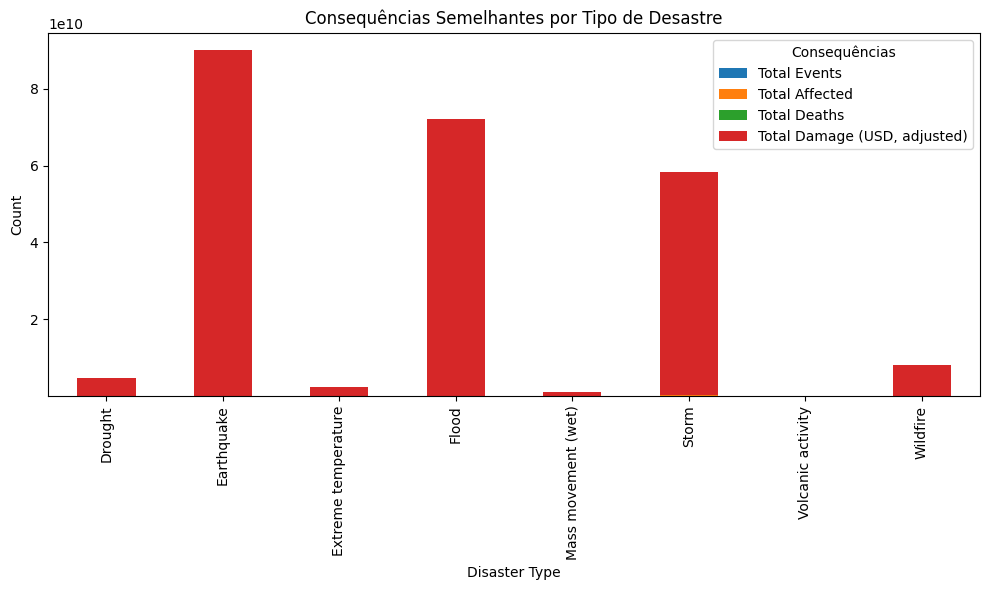

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
grouped_data = dados_filtrados.groupby('Disaster Type').sum()

# Plotando os dados
grouped_data.plot(kind='bar', y=['Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, adjusted)'],
                  figsize=(10, 6), stacked=True)

# Definindo os rótulos e o título do gráfico
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.title('Consequências Semelhantes por Tipo de Desastre')

# Exibindo o gráfico
plt.legend(title='Consequências')
plt.tight_layout()
plt.show()